# Explore here

In [1]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar solo columnas necesarias
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url, usecols=["Latitude", "Longitude", "MedInc"])

# Dividir en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.head()


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


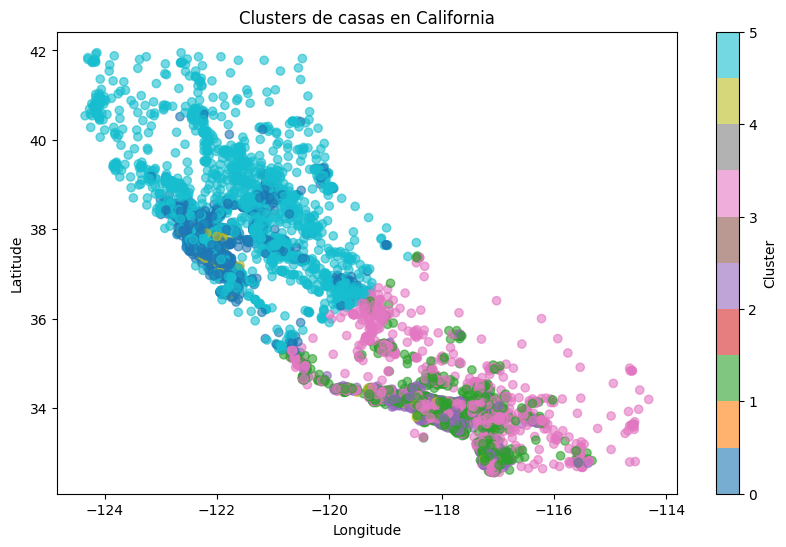

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
train_df["cluster"] = kmeans.fit_predict(train_df)

# Graficar clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_df["Longitude"], train_df["Latitude"], 
                      c=train_df["cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de casas en California")
plt.colorbar(scatter, label="Cluster")
plt.show()


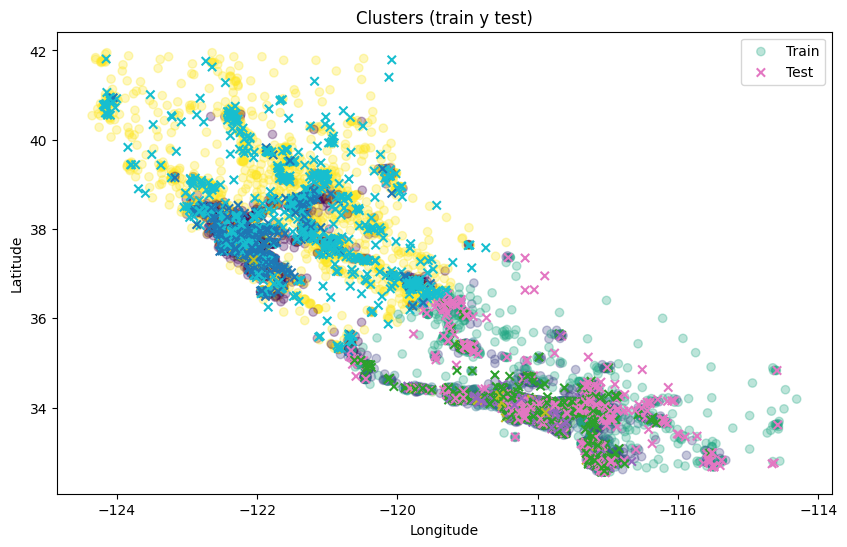

In [4]:
# Predecir con KMeans entrenado
test_df["cluster"] = kmeans.predict(test_df)

# Graficar test sobre el mismo mapa
plt.figure(figsize=(10, 6))
plt.scatter(train_df["Longitude"], train_df["Latitude"], c=train_df["cluster"], alpha=0.3, label="Train")
plt.scatter(test_df["Longitude"], test_df["Latitude"], c=test_df["cluster"], cmap="tab10", marker="x", label="Test")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters (train y test)")
plt.legend()
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenar modelo supervisado
clf = RandomForestClassifier(random_state=42)
clf.fit(train_df[["Latitude", "Longitude", "MedInc"]], train_df["cluster"])

# Evaluar sobre test
y_pred = clf.predict(test_df[["Latitude", "Longitude", "MedInc"]])
print(classification_report(test_df["cluster"], y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [6]:
import joblib
import os

os.makedirs("modelos", exist_ok=True)

joblib.dump(kmeans, "modelos/kmeans_model.pkl")
joblib.dump(clf, "modelos/classifier_model.pkl")


['modelos/classifier_model.pkl']